<a href="https://colab.research.google.com/github/rathi9497/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Prathamesh Anil Rathi


# **Project Summary -**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is..

# **GitHub Link -**

https://github.com/rathi9497/Mobile-Price-Range-Prediction

# **Problem Statement**


The primary objective of this project is to develop a robust machine learning model that accurately predicts the price range of a mobile device based on its specifications. The model should strike a balance between accuracy and generalizability, making it useful for consumers seeking guidance when making purchasing decisions.

The successful completion of this project would result in a tool that can assist consumers in understanding the potential price range of a mobile device given its specifications, thereby simplifying the process of selecting a mobile device that aligns with their budget and preferences.

The problem involves building a predictive model that takes as input various features and specifications of a mobile device, such as processor speed, RAM, camera quality, battery capacity, brand, and more. The model should then output an estimated price range category that the mobile device belongs to (e.g., low, medium, high, premium).



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

# Train Test Split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import scipy.stats as stats

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
path = '/content/drive/MyDrive/data/Mobile_price_range.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
print(f'The number of rows of dataset is {df.shape[0]} and column is {df.shape[1]}')

The number of rows of dataset is 2000 and column is 21


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    2000
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We can see that there is no  missing values available in our dataset.

### What did you know about your dataset?

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Minimum value of px_height and sc_w cannot be zero so we need to handle that and  put mean values to that.

### Variables Description

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you over a call

Three_g - Has 3G or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost),3(very high cost)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variable_List = df.columns.to_list()
for i in variable_List:
  print(f'The unique values of {i} is : ',df[i].unique())

The unique values of battery_power is :  [ 842 1021  563 ... 1139 1467  858]
The unique values of blue is :  [0 1]
The unique values of clock_speed is :  [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
The unique values of dual_sim is :  [0 1]
The unique values of fc is :  [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
The unique values of four_g is :  [0 1]
The unique values of int_memory is :  [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
The unique values of m_dep is :  [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
The unique values of mobile_wt is :  [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 14

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.duplicated().sum()

0

we have 0 duplicated values in dataset.

In [ ]:
# Total phones with sc_w is 0
print(len(df[df.sc_w == 0]))
#  total phones with px_height is 0
print(len(df[df.px_height == 0]))

180
2


In [ ]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w==0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [ ]:
# The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### What all manipulations have you done and insights you found?


We found that in our dataset the column sc_w and px_height have 0 values in 180 rows and 2 rows which which we cannot set to 0 and there is sc_W and px_height is zero ,assigning mean values inplace of 0.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Price

Text(0, 0.5, 'Count')

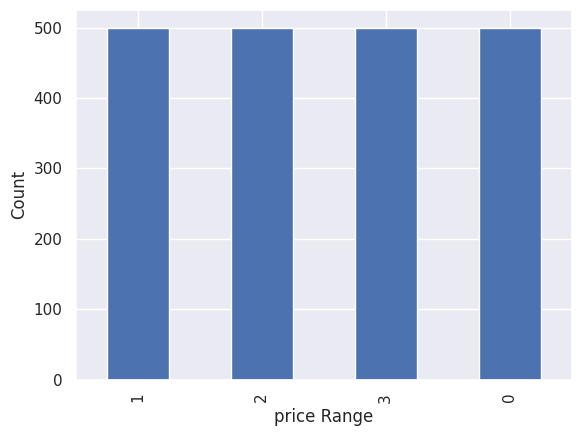

In [ ]:
# Here we Ploting the Price_Range of mobile using barplot
sns.set()
price_plot = df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price Range')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Bar plots are a popular data visualization tool used for presenting categorical data in a graphical format. They consist of rectangular bars with lengths proportional to the values they represent. The primary purpose of using bar plots is to display and compare the values of different categories or groups in a dataset.

##### 2. What is/are the insight(s) found from the chart?

There are mobile phones in 4 price ranges. The number of elements is almost similar. we found that the value count of price range and we plot using barplot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Gained insights shows the values count of the price range and it helps us to knows that which price range is most sold .

 #### Chart - 2

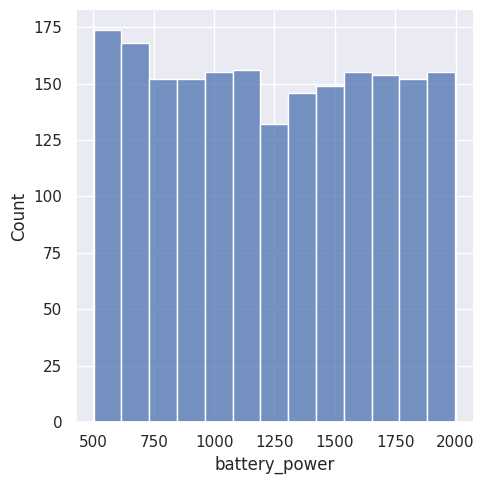

In [ ]:
# Chart - Plotting the battery power
sns.set(rc= {'figure.figsize':(5,5)})
batt_power = sns.displot(df['battery_power'])

##### 1. Why did you pick the specific chart?

Displot is a function from the Seaborn data visualization library in Python. It is used to create a distribution plot, which is a type of data visualization that helps to explore the distribution of a single variable or the relationship between two variables. The primary purpose of using displot is to visualize the underlying distribution of data and identify patterns, trends, and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

We found that count of battery power in the above graph.this plot shows how the battery mAh is spread there is a gradual increase as the price range increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plotting of graph help us to see that the battery power count will help us to know that  which type of battery power is most used in market which helps us to take decision to consider the battery power in next mobile launch according to price range.

#### Chart - 3

<Axes: xlabel='blue', ylabel='price_range'>

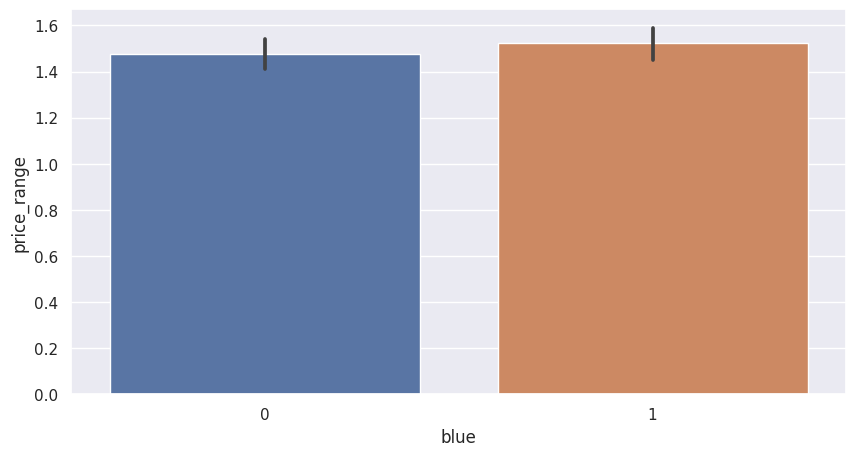

In [ ]:
# Chart - 3 plotting chart for blootooth vs Price Range
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

##### 1. Why did you pick the specific chart?

Bar plots are ideal for showing the frequency or count of each category in a dataset, making it easier to identify patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we found that the half the devices have Bluetooth, and half don’t have bluetooth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph, we plotted bluetooth on x axis and price_range on y axis . We found that the half of the device have bluetooth and half of do not  have bluetooth according to price range.

#### Chart - 4

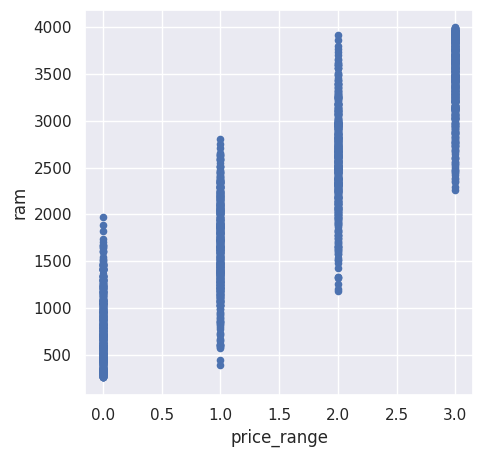

In [ ]:
# Chart - 4 RAM
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots provide a clear and intuitive way to visualize the relationship between two continuous variables, making them a fundamental tool in data analysis and communication of findings.







##### 2. What is/are the insight(s) found from the chart?

We found the relation between two variables Price and RAM and we saw that price range is increasing with increasing in RAM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

RAM has continuous increase with price range while moving from Low cost to very high cost. It will help us to take decision in manufactring of product to decide for maximum and minimum RAM requirement in devices.

#### Chart - 5

<Axes: xlabel='px_width', ylabel='Density'>

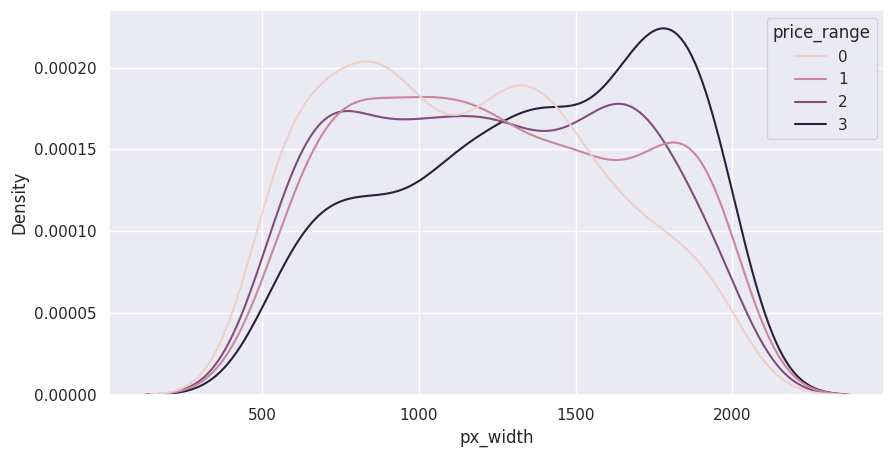

In [ ]:
# Chart - plotting pixel_width
fig,axs = plt.subplots(figsize=(10,5))
sns.kdeplot(data=df,x='px_width',hue='price_range', ax=axs)

##### 1. Why did you pick the specific chart?

KDE plots are a powerful and flexible tool for visualizing and understanding the underlying distribution of continuous data. They are commonly used in data exploration, data analysis, and statistical inference.

##### 2. What is/are the insight(s) found from the chart?

We found that there is not a continuous increase in pixel width as we move from Low cost to very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width so we can say that it would be a driving factor in deciding price_range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

I think this give the positive impact on bussiness growth because the lower price , medium price and higher price all have almost same pixel width. It helps us to decide the price range.

#### Chart - 6

<Axes: xlabel='price_range', ylabel='px_height'>

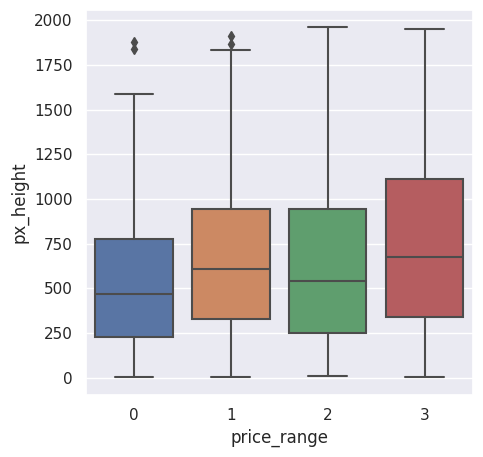

In [ ]:
# Chart - visualising  boxplot of price_range and pixels
sns.boxplot(data=df,x='price_range',y='px_height')

##### 1. Why did you pick the specific chart?

Box plots are a powerful and widely used tool in data analysis and visualization, providing valuable insights into the distribution and characteristics of a dataset. They are particularly helpful for quickly understanding the essential properties of the data and identifying potential issues or patterns.

##### 2. What is/are the insight(s) found from the chart?

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel height. so we can say that it would be a driving factor in deciding price_range.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

IT helps us in deciding the price range .

#### Chart - 7

<Axes: xlabel='blue', ylabel='price_range'>

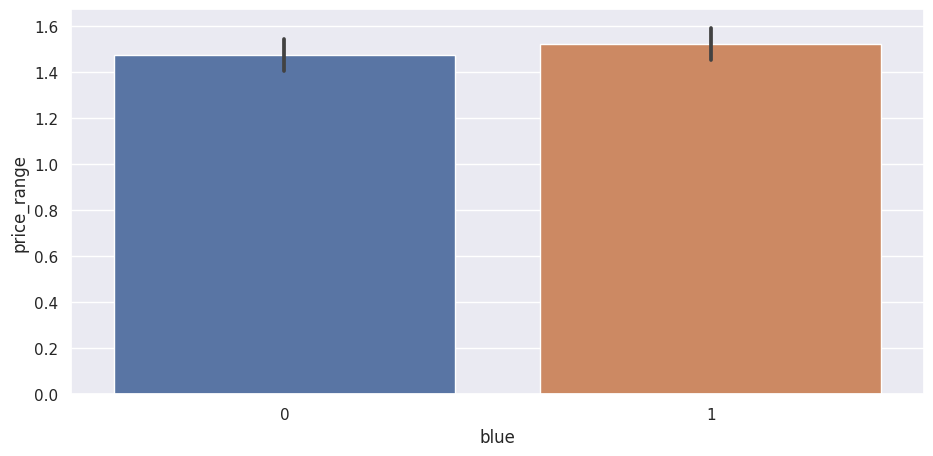

In [ ]:
# Chart - 7 visualization code for pixels vs price_range using box plot
fig,axs = plt.subplots(figsize=(11,5))
sns.barplot(data=df, x='blue', y='price_range', ax=axs)

##### 1. Why did you pick the specific chart?

A bar plot (or bar chart) is a graphical representation of data using rectangular bars or columns. It is commonly used to compare the values of different categories or groups. Each bar represents a category, and the height or length of the bar corresponds to the value or frequency of that category. Bar plots are particularly useful for visualizing categorical data and making comparisons between different groups.

##### 2. What is/are the insight(s) found from the chart?

Blue  is almost similar as we move from Low cost to Very high cost little variation in price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It helps us to decide the price range.

#### Chart - 8

<Axes: xlabel='price_range', ylabel='fc'>

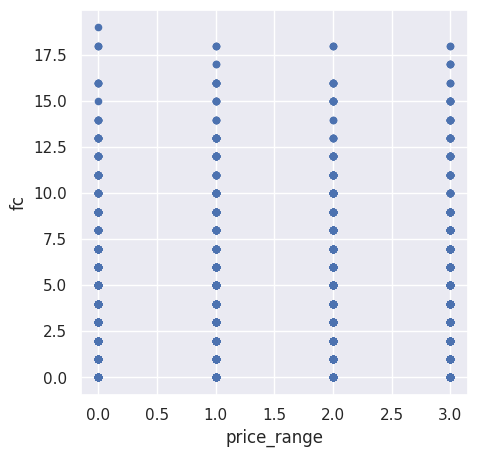

In [ ]:
# Chart - 8  Plotting graph for price_range vs fc(front camera megapixel)
df.plot(x='price_range',y='fc',kind='scatter')

##### 1. Why did you pick the specific chart?

A scatter plot is a type of data visualization that displays individual data points as dots on a two-dimensional coordinate system. It is commonly used to explore and visualize the relationship between two numerical variables. Each dot on the plot represents a single data point, with one variable represented on the x-axis and the other variable represented on the y-axis.

##### 2. What is/are the insight(s) found from the chart?

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight from the above graph is almost along all the price ranges variable, it is not helpful in making in prediction but there is no negative growth.

#### Chart - 9

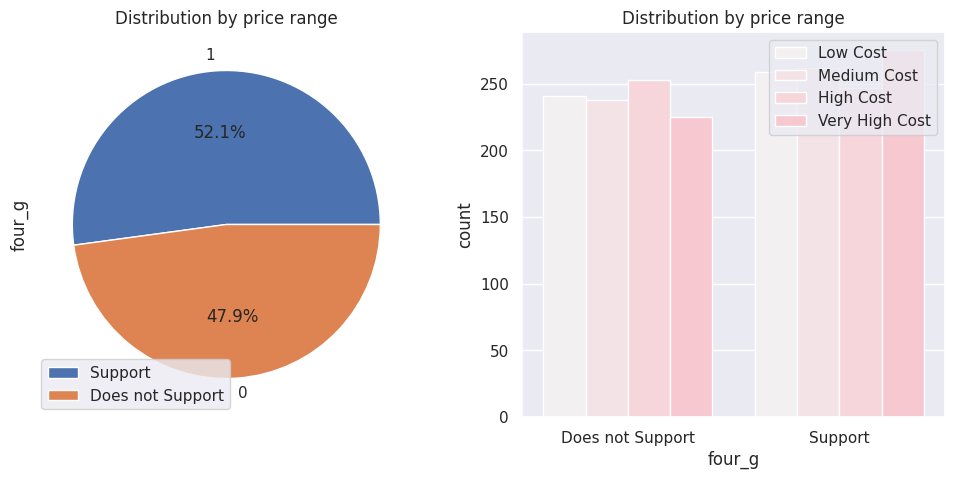

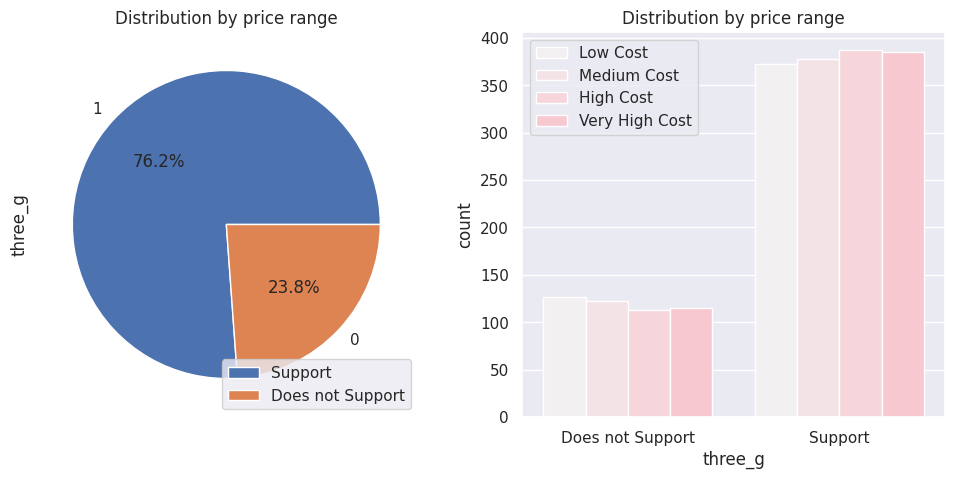

In [ ]:
# Chart - 9 visualization four_g or three_g
binary_features = [ 'four_g', 'three_g']
# Plotting of binary features against price range
for i in binary_features:
  fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
  df[i].value_counts().plot.pie(autopct='%1.1f%%',ax=ax1)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = i, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(i)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

A count plot is a type of data visualization used to display the frequency distribution of categorical data. It is commonly employed to visualize the number of occurrences of each category in a dataset. Count plots are particularly useful when dealing with discrete, non-numeric data.



A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportions. Each slice represents a portion of the whole data set and is sized proportionally to the quantity it represents. Pie charts are useful for displaying the relative sizes of different categories in a dataset, making it easy to understand the distribution or composition of the data at a glance.

##### 2. What is/are the insight(s) found from the chart?

We plot above three_g and four_g graph using pie plot or countplot. Pie plot shows how many percent of devices support 4g or support 3g or not and count plot shows the count of price range which support 3g or 4g .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes , the gained insight will helps us to predict the price range accoring to the devices , which devices we include features like three_g and four_g.

#### Chart - 10 - Correlation Heatmap

<Axes: >

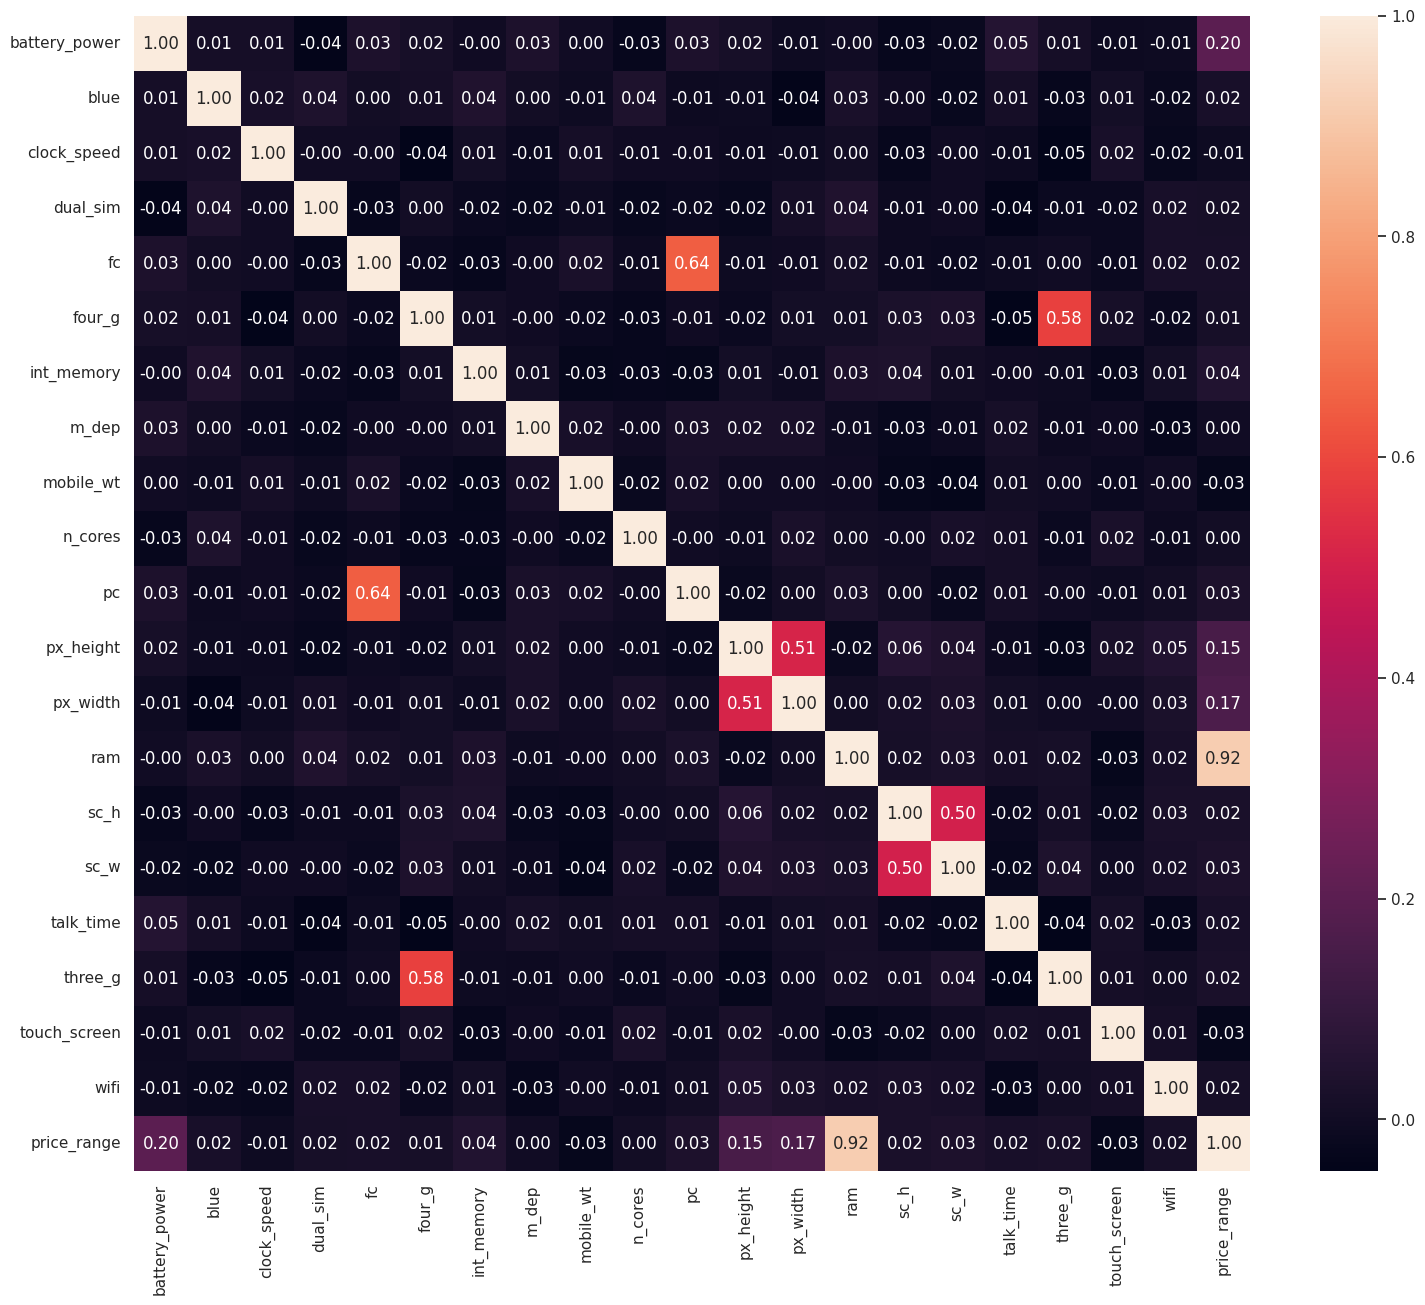

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,fmt='.2f')

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical representation of the correlation matrix, which shows the correlation coefficients between multiple variables in a dataset. Correlation coefficients quantify the strength and direction of the linear relationship between two variables. A heatmap is used to visually represent these correlation coefficients using colors, making it easier to identify patterns and relationships among variables.

##### 2. What is/are the insight(s) found from the chart?

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.
Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

#### Chart - 11

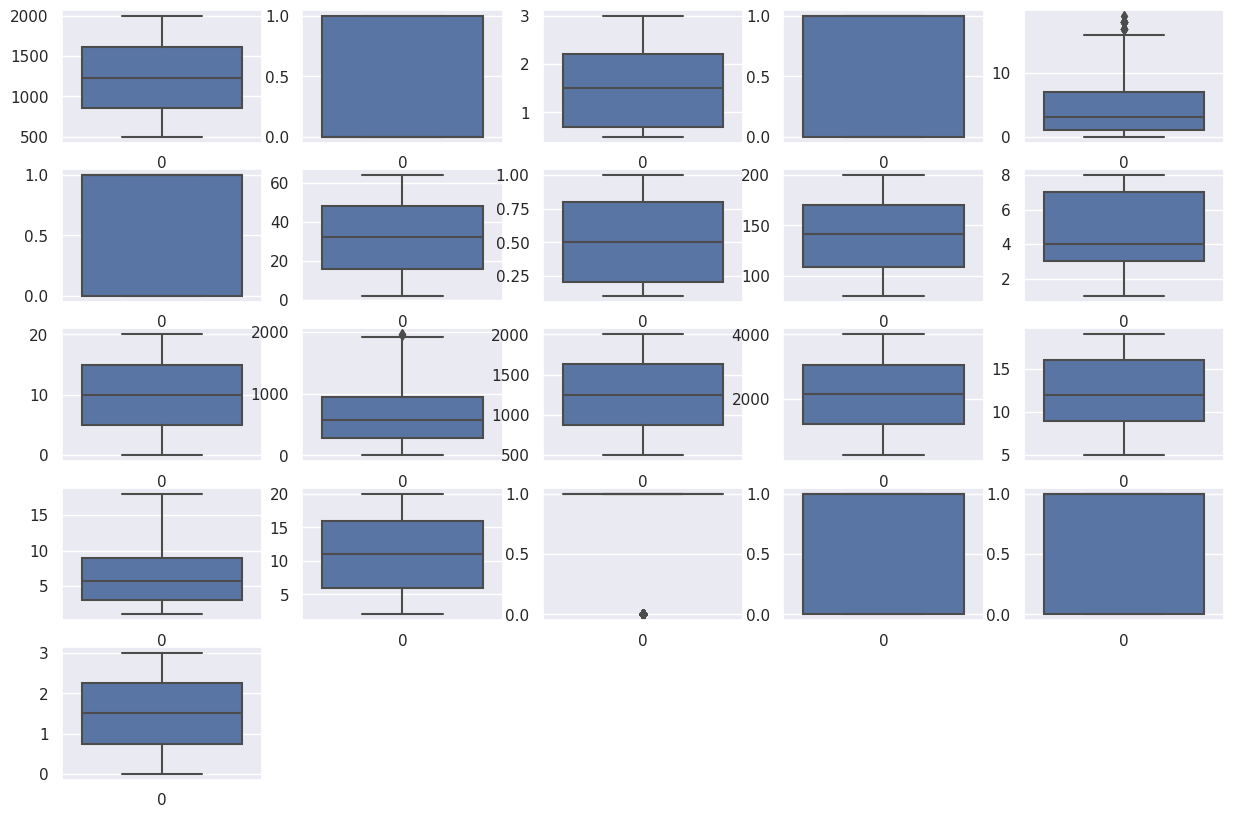

In [ ]:
#  looking for outliers using box plot
plt.figure(figsize=(15,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()]):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

##### 1. Why did you pick the specific chart?

It displays a summary of key statistics such as the median, quartiles, and potential outliers. A box plot provides insights into the spread and central tendency of the data and is particularly useful for comparing distributions between different groups or categories.

##### 2. What is/are the insight(s) found from the chart?

We found that there is no much outlier in the daataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No there is not any negative growth on bussiness because it help us to know only data spread and comparing the variable and looking for a outliers.

#### Chart - 12 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=df,hue='price_range')

##### 1. Why did you pick the specific chart?

A pair plot is a type of data visualization that displays pairwise relationships and distributions of multiple variables in a dataset. It is especially useful for exploring correlations and patterns between variables. Pair plots are commonly used in data analysis and can provide insights into how different variables relate to each other.

##### 2. What is/are the insight(s) found from the chart?

in above pairplot graph we found the pairwise relation and distribution of all variable with respect to price range. we can see that variation in price range accordingly each variable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The positive effect of blue on price_range is observable.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: blue and price_range are independent to each other.

Alternative hypothesis: blue and price_range are dependent to each other.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats import weightstats as stests

df_blue1=df[df['blue']==1]["price_range"]
df_blue0=df[df["blue"]==0]["price_range"]

#applying z-test
ztest ,probability_value = stests.ztest(df_blue1, df_blue0,value=0)
print("Z statistic=",ztest)
print("P- value= ",float(probability_value))

#two tailed test
if probability_value<0.025 or probability_value>0.950:
  print("Null hypothesis rejected , Alternative hypothesis accepted")
else:
  print("Null hypothesis accepted")

Z statistic= 0.9197805310100012
P- value=  0.35768745928833334
Null hypothesis accepted


##### Which statistical test have you done to obtain P-Value?

We have done a Z-test to obtain a P- value.

##### Why did you choose the specific statistical test?

We have choosen Z- test here to compare mean of sales when promo was applied and when promo was not applied. Null hypothesis is that promo and sales are independent implies that difference of mean will be in the 95% confidence range. If the difference of mean is larger than than the 95% confidence interval then promotion application is influencing the mean of sales and hence the sales also.

Seeing the P- value , and applying two tailed test, we can reject our null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The mobile present market is two types touch_screen or without touch scree so our statement is both of the mobile is related to price_range .

Null hypothesis: price_range are significantly higher for touch screen as compared to without touch screen.

Alternative Hypothesis: There is no significant difference between touch screen or without touch screen price range.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Performing t-test for Stores that remain open and closed during Holidays
from scipy.stats import ttest_ind

df_touch1=df[df['touch_screen']==1]["price_range"]
df_touch0=df[df["touch_screen"]==0]["price_range"]
t,p_value = ttest_ind(df_touch1, df_touch0, equal_var=False)

In [ ]:
# Check if p-value is less than alpha
alpha = 0.05
print('p_value=',p_value)
if p_value < alpha:
    print("Null hypothesis rejected ,There is no significant difference in touch screen and without touch. ")
else:
    print("Null hypothesis accepted \n Alternative hypothesis rejected \n price_range are significantly higher for touch screen mobile as compared to without touch screen. ")


p_value= 0.17396282527272028
Null hypothesis accepted 
 Alternative hypothesis rejected 
 price_range are significantly higher for touch screen mobile as compared to without touch screen. 


##### Which statistical test have you done to obtain P-Value?

We have perform t-test to obtain P value.

##### Why did you choose the specific statistical test?

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups or conditions. we use t test to determine the difference in Sales between Stores that remain open during Holidays and those that remain closed.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We don't have any missing values. We already removed all missing/null/duplicate values in Data Wrangling section.

We checked all missing/null values of various columns and replaced with median and mode.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Separate numerical and categorical features
num_cols = pd.DataFrame (df, columns= ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])
cat_cols = pd.DataFrame (df, columns= ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'])

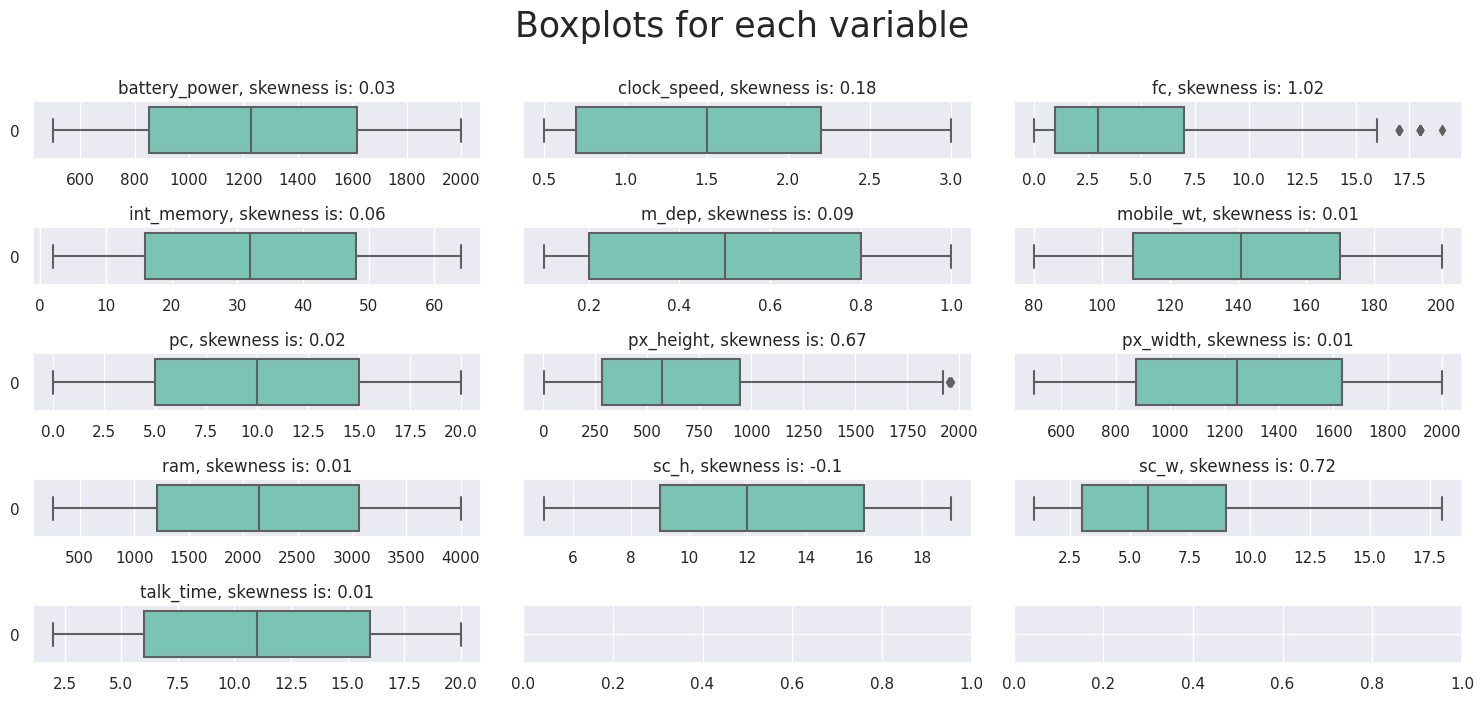

In [ ]:
# Visualizing the Numerical Features by boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#6fcfbc', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

boxplots_custom(dataset=df, columns_list=num_cols, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [ ]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0,0,18,0,0,0,0,2,0,0,0,0,0


##### What all outlier treatment techniques have you used and why did you use those techniques?

While the boxplots in the table above indicate the presence of outliers in the fc and px_height features, we cannot justify removing them from the dataset without a strong rationale to do so. Therefore, we have decided to retain these outliers in our analysis.

### 3. Categorical Encoding -- Not Applicable

#### What all categorical encoding techniques have you used & why did you use those techniques?

There is no need of categorical Encoading in this dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)

In [ ]:
# Let's drop sc_h and s_w
df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [ ]:
#  Making New variable for Pixels

df['pixels'] = df['px_height']*df['px_width']

In [ ]:
# Dropping px_height and px_width columns
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

#### 2. Feature Selection

In [ ]:
# Defining X and y

x = df.drop(['price_range'], axis = 1)
y = df['price_range']

##### What all feature selection methods have you used  and why?

price range is dependent on all other features
 battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt, n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_size,pixels  so price range is our dependent varibale and others is independent variable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

There is no need of data transformatiom in this data set.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction - Not applied

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 42)

In [ ]:
print(x_train.shape)

(1600, 18)


In [ ]:
print(y_train.shape)

(1600,)


##### What data splitting ratio have you used and why?

we have used the ratio of 80% of training data and 20% of testing data size.

### 9. Handling Imbalanced Dataset-Not Applied

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(x_train, y_train)

# Predict on the model
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.86      0.87      0.86        90
           2       0.82      0.82      0.82        92
           3       0.92      0.93      0.92       111

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Applying cross validation to check for improvements
np.random.seed(42)  # for reproducible results
Glogistic_regressor= LogisticRegression()
parameters = {'fit_intercept':[True,False]}
Grid_reg = GridSearchCV(Glogistic_regressor,parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm
Grid_reg.fit(x_train,y_train)
# Predict on the model
y_train_gridreg_pred = Grid_reg.predict(x_train)
y_test_gridreg_pred = Grid_reg.predict(x_test)

print(f"The best alpha value found out to be: {Grid_reg.best_params_}")
print(f"Negative mean square error is: {Grid_reg.best_score_}")

The best alpha value found out to be: {'fit_intercept': True}
Negative mean square error is: -0.121875


In [ ]:
#coefficients after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.coef_

array([[-3.31113008e+00, -6.65110297e-02,  1.96843509e-01,
         9.64058301e-02, -1.51424986e-01,  2.46132337e-02,
        -1.46935186e-01, -8.18694619e-02,  4.29228011e-01,
         1.79440527e-02, -1.14788283e-01, -1.38947939e+01,
        -1.24120998e-01, -1.51171005e-01,  9.63009752e-02,
        -1.46281307e-02, -1.15763113e-01, -4.04130360e+00],
       [-9.20817472e-01,  1.38433596e-02, -9.67417064e-02,
        -1.36326843e-02,  2.03436301e-01,  7.83303398e-02,
         2.85687566e-02,  2.70452907e-01,  1.29544771e-01,
        -3.05692536e-01, -5.99706834e-02, -3.88891390e+00,
         5.43135147e-02, -9.42530892e-02,  3.39110835e-02,
         6.83212921e-02, -1.18473680e-01, -8.13829655e-01],
       [ 8.86400971e-01, -1.53560014e-02,  6.14869583e-02,
        -1.49385996e-01,  1.28661924e-01, -1.18067756e-01,
        -2.75183078e-01, -1.54477614e-01,  1.53422293e-01,
         1.25678136e-01,  1.29177734e-02,  4.08328324e+00,
        -1.03933127e-01,  1.35534891e-01, -1.28117087e

In [ ]:
#intercept after hyperparamenter and crossvalidation
Grid_reg.best_estimator_.intercept_

array([  8.3149541 ,   3.75114156,  -1.28875236, -10.77734329])

In [ ]:
# Get best parameters and model
best_params = Grid_reg.best_params_
best_model = Grid_reg.best_estimator_

In [ ]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       403
           1       0.89      0.89      0.89       410
           2       0.86      0.90      0.88       388
           3       0.96      0.93      0.95       399

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [ ]:
y_pred = best_model.predict(x_test)
mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse1)
print("Mean Absolute Error:", mae1)
print("R-squared:", r2_1)

Best Parameters: {'fit_intercept': True}
Mean Squared Error: 0.105
Mean Absolute Error: 0.105
R-squared: 0.9213037347935863


##### Which hyperparameter optimization technique have you used and why?

I have used the grid search cv hyperparameter tuning for tuning the parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning that we have improve our accuracy score of model which can be shown above.

### ML Model - 2

In [ ]:
from sklearn.linear_model import ElasticNet
# ML Model - 2 Implementation
el_net= ElasticNet()

# parameters for hypertuning
parameters_el_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

#instantiating gridsearchcv
Gridel_net = GridSearchCV(el_net, parameters_el_net, scoring='neg_mean_squared_error', cv=5)

# Fitting the Algorithm
Gridel_net.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 1, 5],
                         'max_iter': [12, 13, 14, 15]},
             scoring='neg_mean_squared_error')

In [ ]:
# Predict on the model
y_train_el_net_pred = Gridel_net.predict(x_train)
y_test_el_net_pred = Gridel_net.predict(x_test)

print(f"The best alpha value found out to be: {Gridel_net.best_params_}")
print(f"Negative mean square error is: {Gridel_net.best_score_}")


The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 12}
Negative mean square error is: -0.10804286966621683


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
best_params_2 = Gridel_net.best_params_
mse2 = mean_squared_error(y_test, y_test_el_net_pred)
mae2 = mean_absolute_error(y_test, y_test_el_net_pred)
r2_2 = r2_score(y_test, y_test_el_net_pred)

print("Best Parameters:", best_params_2)
print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("R-squared:", r2_2)

Best Parameters: {'alpha': 0.001, 'max_iter': 12}
Mean Squared Error: 0.11135056887177998
Mean Absolute Error: 0.2737649209445754
R-squared: 0.9165440581064892


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a class from scikit-learn (a popular machine learning library in Python) that facilitates performing an exhaustive search over a specified parameter grid for hyperparameter tuning. This process helps you find the best combination of hyperparameters for your machine learning model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes, we have seen that impovement in our elasticnet model. we can see in the above score .

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Mean Squared Error (MSE) is a commonly used metric for evaluating the performance of regression models. It measures the average squared difference between the predicted values and the actual target values. The lower the MSE, the better the model's fit to the data.
Mean Squared Error: 0.11135056887177998

Mean Absolute Error (MAE) is another commonly used metric for evaluating the performance of regression models. It measures the average absolute difference between the predicted values and the actual target values. Like MSE, lower MAE values indicate a better fit of the model to the data.

Mean Absolute Error: 0.2737649209445754

It seems like you're asking about the coefficient of determination, commonly referred to as R-squared (R²), which is a metric used to assess the goodness of fit of a regression model. R-squared quantifies the proportion of the variance in the dependent variable that is predictable from the independent variables in the model. It provides an indication of how well the model explains the variability in the data.

R-squared: 0.9165440581064892

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
dtc = DecisionTreeClassifier(max_depth = 5)
# Fit the Algorithm
dtc.fit(x_train, y_train)
# Predict on the model
y_pred_test = dtc.predict(x_test)
y_pred_train = dtc.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse3 = mean_squared_error(y_test, y_pred_test)
mae3 = mean_absolute_error(y_test, y_pred_test)
r2_3 = r2_score(y_test, y_pred_test)

print("Mean Squared Error:", mse3)
print("Mean Absolute Error:", mae3)
print("R-squared:", r2_3)

Mean Squared Error: 0.18
Mean Absolute Error: 0.18
R-squared: 0.865092116789005


In [ ]:
print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
# Fit the Algorithm
grid.fit(x_train, y_train)
# Predict on the model
y_pred_test = grid.predict(x_test)
y_pres_train = grid.predict(x_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

In [ ]:
# Evaluation metrics for test
best_para = grid.best_params_
mse3 = mean_squared_error(y_test, y_pred_test)
mae3 = mean_absolute_error(y_test, y_pred_test)
r2_3 = r2_score(y_test, y_pred_test)

print('best parameter : ', best_para)
print("Mean Squared Error:", mse3)
print("Mean Absolute Error:", mae3)
print("R-squared:", r2_3)

best parameter :  {'max_depth': 30, 'max_leaf_nodes': 100}
Mean Squared Error: 0.1575
Mean Absolute Error: 0.1575
R-squared: 0.8819556021903794


In [ ]:
print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       105
           1       0.73      0.85      0.78        91
           2       0.78      0.71      0.74        92
           3       0.90      0.92      0.91       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



[[ 92  13   0   0]
 [  5  77   9   0]
 [  0  16  65  11]
 [  0   0   9 103]]


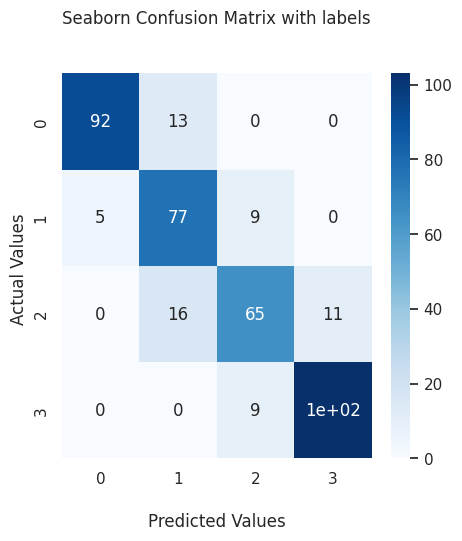

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       395
           1       0.81      0.88      0.84       409
           2       0.77      0.84      0.80       408
           3       0.96      0.84      0.90       388

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600



##### Which hyperparameter optimization technique have you used and why?

I have used gridsearch cv hyper parameter for tuning model. and also we noted that the performance of model improved. as compared to the previous result.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

this metric score is before hyperparameter tuning :
Mean Squared Error: 0.18

Mean Absolute Error: 0.18

R-squared: 0.865092116789005
 and after hyperparameter tuning the result is: best parameter :  {'max_depth': 30, 'max_leaf_nodes': 100}

Mean Squared Error: 0.1425

Mean Absolute Error: 0.1425

R-squared: 0.8931979257912956

we noted that our model is very much improved after hyperparameter tuning.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
result_df = pd.DataFrame({"model":['Logistic Regression','Elasticnet',"Decision Tree"],
                          'R2 Score':[r2_1,r2_2,r2_3],
                          'MAE':[mae1,mae2,mae3],
                          'MSE':[mse1,mse2,mse3]})
result_df

,model,R2 Score,MAE,MSE
0,Logistic Regression,0.921304,0.105000,0.105000
1,Elasticnet,0.916544,0.273765,0.111351
2,Decision Tree,0.881956,0.157500,0.157500


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

so, here we are using R2-score , mean absolute error and root mean square for evaluation(MAE), and mean square error (MSE) for evaluation of the performance of the ML model. we know the the ideal model should r2score is equal to 1 or nearest to 1. and the value of mse and mae should be 0. so we have compared the overall result in above result_df as we can see that the our Logistic Regression ML model is better than all other three model. because metric score  of logistic regression is giving better result as compared to other ml model.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
loaded_model

LogisticRegression()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The final conclusion is that we evaluate three Ml model above and the losistic regression model is performing better than the other two model so, we go for logistic regression model.:

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***